<a href="https://colab.research.google.com/github/Ayushjha02/MLNN_Image_class/blob/Chukwuebuke-Nwadishi/Copy_of_MLNN_Image_class_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import numpy as np
from PIL import Image

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Group_Project_Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Group_Project_Data/Train/Fake/img_2189.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2189.png  
  inflating: Group_Project_Data/Train/Fake/img_460.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_460.png  
  inflating: Group_Project_Data/Train/Fake/img_1480.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1480.png  
  inflating: Group_Project_Data/Train/Fake/img_1494.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1494.png  
  inflating: Group_Project_Data/Train/Fake/img_474.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_474.png  
  inflating: Group_Project_Data/Train/Fake/img_312.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_312.png  
  inflating: Group_Project_Data/Train/Fake/img_2823.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2823.png  
  inflating: Group_Project_Data/Train/Fake/img_1319.png  
  inflat

In [ ]:
!unzip /content/drive/MyDrive/Group_Project_Data.zip > /dev/null

replace __MACOSX/._Group_Project_Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Data fetching
train_image_file ='/content/Group_Project_Data/Train'
test_image_file= '/content/Group_Project_Data/Valid'



# Define the input shape of the images
input_shape = (64, 64)

# Set the batch size for training and testing
train_batch_size = 94
test_batch_size = 32



# Create an image data generator for the training set
train_datagen = ImageDataGenerator( rescale=1./255)

# Create an image data generator for the testing set
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the image generators
train_generator = train_datagen.flow_from_directory(
    train_image_file,
    target_size=input_shape,
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    classes=['Real', 'Fake'],
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_image_file,
    target_size=input_shape,
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    classes=['Real', 'Fake'],
    shuffle=True
)
# Get the number of training and test samples
num_train_samples = train_generator.samples
num_test_samples = test_generator.samples

# Get the number of classes
num_classes = train_generator.num_classes

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Get the training and test data and labels
# x_train, y_train = next(train_generator)
# x_test, y_test = next(test_generator)
# # Count the number of images in the training and testing sets
# train_count = sum([len(files) for r, d, files in os.walk(train_folder) if any(file.endswith('.png') for file in files)])
# test_real_count = len(glob.glob(os.path.join(test_folder, 'Real', '*.png')))
# test_fake_count = len(glob.glob(os.path.join(test_folder, 'Fake', '*.png')))
# train_real_count = len(glob.glob(os.path.join(train_folder, 'Real', '*.png')))
# train_fake_count = len(glob.glob(os.path.join(train_folder, 'Fake', '*.png')))

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Data Preprocessing
# Check that the counts match the expected values
expected_train_count = 6000
expected_test_count = 2000

num_batches = len(train_generator)
#concatenating the batches to form the complete training dataset
x_train = []
y_train = []
# Loop over each batch in the train generator and extract the data
for i in range(num_batches):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the input and output arrays
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)



# Set the number of batches in the test generator
num_batches = len(test_generator)

# Initialize empty lists for x_test and y_test
x_test = []
y_test = []

# Loop over each batch in the test generator and extract the data
for i in range(num_batches):
    x_batch, y_batch = next(test_generator)
    x_test.append(x_batch)
    y_test.append(y_batch)

# Concatenate the input and output arrays
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [ ]:
print(y_test.shape)
print(len(y_test))

(2000,)
2000


In [ ]:
regularize_1 = regularizers.L1(0.1)
regularize_2 = regularizers.L2(0.1)

inp = tf.keras.layers.Input((64, 64, 1),dtype='float32', name='inp')
conv_1 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same', 
                            name='conv_1')(inp)
pool_1 = tf.keras.layers.MaxPooling2D((2,2),name='pool_1')(conv_1)
pool_2 = tf.keras.layers.MaxPooling2D((2,2),name='pool_2')(pool_1)
pool_3 = tf.keras.layers.MaxPooling2D((2,2),name='pool_3')(pool_2)
conv_2 = tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same',
                          name='conv_2')(pool_3)                     
pool_4 = tf.keras.layers.MaxPooling2D((2,2),name='pool_4')(conv_2)
flat = tf.keras.layers.Flatten()(pool_3)
#fc_1 = tf.keras.layers.Dense(512,activation='relu')(flat)
fc_2 = tf.keras.layers.Dense(512,activation='relu')(flat)
output = tf.keras.layers.Dense(1, activation='sigmoid')(fc_2)

class_model = models.Model(inputs=inp,outputs=output,name='class_model')

print(class_model.summary())


Model: "class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inp (InputLayer)            [(None, 64, 64, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 32)        0         
                                                                 
 pool_2 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 pool_3 (MaxPooling2D)       (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               

In [ ]:
# Model Optimization

opt = tf.keras.optimizers.SGD(learning_rate=0.001)
class_model.compile(opt,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
print(y_train.shape)

(6000,)


In [ ]:
#Model fit
history = class_model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test),
    shuffle=True
)

# history = class_model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=20,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // test_generator.batch_size,
# )

Epoch 1/20
188/188 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.4877 - val_loss: 0.6911 - val_accuracy: 0.5445
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6902 - accuracy: 0.6398 - val_loss: 0.6892 - val_accuracy: 0.6865
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6883 - accuracy: 0.7373 - val_loss: 0.6875 - val_accuracy: 0.7715
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6867 - accuracy: 0.7765 - val_loss: 0.6859 - val_accuracy: 0.8225
Epoch 5/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6851 - accuracy: 0.8030 - val_loss: 0.6843 - val_accuracy: 0.8385
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6836 - accuracy: 0.8307 - val_loss: 0.6828 - val_accuracy: 0.8315
Epoch 7/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6822 - accuracy: 0.8305 - val_loss: 0.6814 - val_accuracy: 0.8415
Epoch 

In [ ]:
#Saving Model
class_model.save('/content/Group_Project_Model')

In [ ]:
# Model Evalution
# Evaluate the model on the test data
test_loss, test_acc = class_model.evaluate(x_test, y_test, verbose=2)

# Print the test loss and accuracy metrics
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


63/63 - 0s - loss: 0.6598 - accuracy: 0.9425 - 144ms/epoch - 2ms/step
Test loss: 0.6597567796707153
Test accuracy: 0.9424999952316284


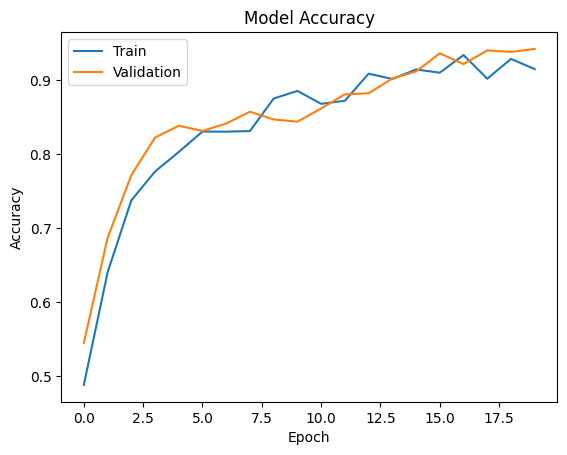

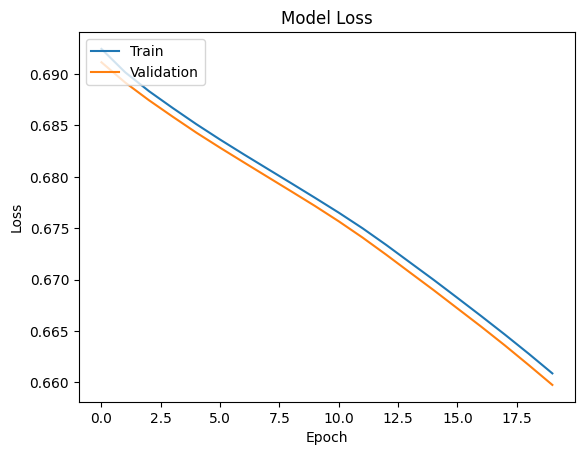

In [ ]:
# Ploting
# Visualize the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
  # prediction
# Make predictions on a new test dataset
y_pred = class_model.predict_generator(x_test)

# Print the predicted classes for the first 10 images
predictions = tf.where(y_pred <= 0.5, 0, 1)
predictions = np.array(predictions)
print('Predictions:\n', predictions[:20])
print('Actual classes:', (y_test[:20]))

<ipython-input-21-3890b4f33d7e>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = class_model.predict_generator(x_test)


Predictions:
 [[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
Actual classes: [1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
